In [2]:
import random, gym, math
from gym import error, spaces
import pandas as pd
import numpy as np
from enum import Enum
from stockstats import StockDataFrame
# from tensorboardX import SummaryWriter

import gym

import tensorflow as tf
from stable_baselines.common.policies import MlpPolicy, CnnPolicy, MlpLstmPolicy, ActorCriticPolicy, LstmPolicy
from stable_baselines.common.vec_env import DummyVecEnv
from stable_baselines.common.evaluation import evaluate_policy
from stable_baselines import PPO2, PPO1, A2C, DQN, TD3, SAC, ACER

# from stable_baselines3.common.policies import MlpPolicy
# from stable_baselines3 import PPO
# from stable_baselines3.common.vec_env import DummyVecEnv
# from stable_baselines3.common.evaluation import evaluate_policy

from sklearn import preprocessing

import datetime
import backtrader as bt
import backtrader.indicators as bi
from backtrader.feeds import PandasData

import matplotlib.pyplot as plt

from backtrader_plotting import Bokeh
from backtrader_plotting.schemes import Tradimo, Blackly

In [3]:
from lutils.stock import LTdxHq

In [4]:
# result = pd.read_pickle('d:/d.pkl')

In [5]:
# result[y_kmeans==5]

In [6]:
MAX_ACCOUNT_BALANCE = 2147483647
MAX_NUM_SHARES = 2147483647
MAX_NUM_AMOUNTS = 2147483647
MAX_SHARE_PRICE = 5000
MAX_OPEN_POSITIONS = 60
MAX_STEPS = 240 # 40000
NEXT_OBSERVATION_SIZE = 10

INITIAL_ACCOUNT_BALANCE = 10000

# writer = SummaryWriter('log')

In [7]:
# ltdxhq = LTdxHq()
# code = '603636' # 603828 603828 000032 300142 603636 600519
# # df = ltdxhq.get_k_data_1min(code, end='2021-09-02') # 000032 300142 603636 600519
# df = ltdxhq.get_k_data_daily(code, end='2021-01-01') # 000032 300142 603636 600519
# df = StockDataFrame(df.rename(columns={'vol': 'volume'}))
# # df['macd']
# # df['kdjk']
# # df['rsi_6']
# # df['rsi_12']

# # df_eval = ltdxhq.get_k_data_1min(code, start='2021-08-10')
# df_eval = ltdxhq.get_k_data_daily(code, start='2021-01-01')
# df_eval = StockDataFrame(df_eval.rename(columns={'vol': 'volume'}))

# ltdxhq.close()

In [8]:
# ltdxhq = LTdxHq()

# codes = ['603636', ] # '603828', '603828', '000032', '300142', '603636', '600519'
# dfs = []
# for code in codes:
#     _df = ltdxhq.get_k_data_daily(code, end='2021-01-01')
# #     _df = StockDataFrame(_df.rename(columns={'vol': 'volume'}))
#     _df = _df.rename(columns={'vol': 'volume'})
    
#     _df = _df.assign(open_normal = _df.open / _df.open.max())
#     _df = _df.assign(close_normal = _df.close / _df.close.max())
#     _df = _df.assign(high_normal = _df.high / _df.high.max())
#     _df = _df.assign(low_normal = _df.low / _df.low.max())
#     _df = _df.assign(volume_normal = _df.volume / _df.volume.max())
#     _df = _df.assign(amount_normal = _df.amount / _df.amount.max())
    
#     dfs.append(_df) # / _df.max())

# df = pd.concat(dfs)

# df_evals = []
# for code in codes:
#     _df = ltdxhq.get_k_data_daily(code, start='2021-01-01')
#     _df = _df.rename(columns={'vol': 'volume'})
    
#     _df = _df.assign(open_normal = _df.open / _df.open.max())
#     _df = _df.assign(close_normal = _df.close / _df.close.max())
#     _df = _df.assign(high_normal = _df.high / _df.high.max())
#     _df = _df.assign(low_normal = _df.low / _df.low.max())
#     _df = _df.assign(volume_normal = _df.volume / _df.volume.max())
#     _df = _df.assign(amount_normal = _df.amount / _df.amount.max())
    
#     df_evals.append(_df)
# ltdxhq.close()

In [10]:
ltdxhq = LTdxHq()

# codes = ['603636', '603828', '688698', '000032', '300142', '603636', ] # '600519'
codes = ['600603', '600583', '600582', '600565', '600558', '600551',
       '600509', '600503', '600488', '600469', '600439', '600433',
       '600428', '600425', '600387', '600383', '600382', '600369',
       '600339', '600337', '600335', '600326', '600320', '600312',
       '002666', '002654', '002641', '002628', '002627', '002620',
       '002608', '002593', '002586', '002582', '002566', '002560',]
dfs = []
df_evals = []
for code in codes:
    _df = ltdxhq.get_k_data_daily(code)
#     _df = StockDataFrame(_df.rename(columns={'vol': 'volume'}))
    _df = _df.rename(columns={'vol': 'volume'})
    
    _df = _df.assign(open_normal = _df.open / _df.open.max())
    _df = _df.assign(close_normal = _df.close / _df.close.max())
    _df = _df.assign(high_normal = _df.high / _df.high.max())
    _df = _df.assign(low_normal = _df.low / _df.low.max())
    _df = _df.assign(volume_normal = _df.volume / _df.volume.max())
    _df = _df.assign(amount_normal = _df.amount / _df.amount.max())
    
    dfs.append(_df.loc[:'2021-01-01']) # / _df.max())
    df_evals.append(_df.loc['2021-01-01':])
    
df = pd.concat(dfs)

ltdxhq.close()

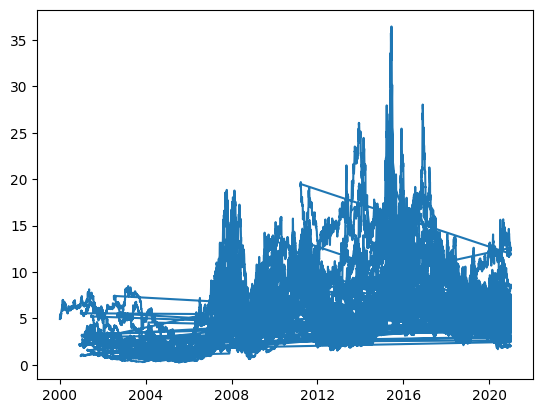

In [11]:
plt.plot(df.close)
plt.show()

In [12]:
df

,open,close,high,low,volume,amount,open_normal,close_normal,high_normal,low_normal,volume_normal,amount_normal
date,,,,,,,,,,,,
2000-01-04,4.78,4.94,4.95,4.77,1400800.0,19873510.0,0.469087,0.477756,0.455801,0.472277,0.014870,0.022972
2000-01-05,4.93,5.19,5.43,4.86,7043100.0,107845504.0,0.483808,0.501934,0.500000,0.481188,0.074764,0.124658
2000-01-06,5.13,5.35,5.37,5.07,2145300.0,32499732.0,0.503435,0.517408,0.494475,0.501980,0.022773,0.037566
2000-01-07,5.35,5.43,5.61,5.27,7018700.0,110908752.0,0.525025,0.525145,0.516575,0.521782,0.074505,0.128199
2000-01-10,5.44,5.48,5.60,5.33,5804700.0,92433640.0,0.533857,0.529981,0.515654,0.527723,0.061618,0.106843
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-25,8.38,8.57,8.65,8.32,7890620.0,67008188.0,0.490058,0.520024,0.492316,0.517735,0.061927,0.043108
2020-12-28,8.55,8.35,8.59,8.25,7404903.0,61921968.0,0.500000,0.506675,0.488902,0.513379,0.058115,0.039836
2020-12-29,8.35,8.35,8.52,8.33,5257100.0,44167640.0,0.488304,0.506675,0.484917,0.518357,0.041259,0.028414


In [13]:
class Actions(Enum):
    Hold = 0
    Sell = 1
    Buy = 2

In [83]:
class LStockDailyEnv(gym.Env):
    """A stock trading environment for OpenAI gym"""
    metadata = {'render.modes': ['human']}

    def __init__(self, df):
        super(LStockDailyEnv, self).__init__()

#         self.df = df / df.max()
#         self.max = df.max()
        self.df = df
        self.max = df.max()

        self.current_step = NEXT_OBSERVATION_SIZE - 1

#         self.reward_range = (-np.inf, np.inf)
        self.reward_range = (-1, 1)

#         self.action_space = spaces.Box(low=np.array([0, 0]), high=np.array([3, 1]), dtype=np.float16)
        self.action_space = spaces.Discrete(len(Actions))
        
        self.observation_space = spaces.Box(low=-1, high=1, shape=(6, NEXT_OBSERVATION_SIZE + 1), dtype=np.float16)
#         self.min_max_scaler = preprocessing.MinMaxScaler()

    def _next_observation(self):
        # Get the stock data points for the last 5 days and scale to between 0-1
        frame = np.array([
            # self.df.iloc[self.current_step: self.current_step + NEXT_OBSERVATION_SIZE]['open'].values / MAX_SHARE_PRICE,
            # self.df.iloc[self.current_step: self.current_step + NEXT_OBSERVATION_SIZE]['high'].values / MAX_SHARE_PRICE,
            # self.df.iloc[self.current_step: self.current_step + NEXT_OBSERVATION_SIZE]['low'].values / MAX_SHARE_PRICE,
            # self.df.iloc[self.current_step: self.current_step + NEXT_OBSERVATION_SIZE]['close'].values / MAX_SHARE_PRICE,
            # self.df.iloc[self.current_step: self.current_step + NEXT_OBSERVATION_SIZE]['vol'].values / MAX_NUM_SHARES,

            # self.df['macd'][self.current_step: self.current_step + NEXT_OBSERVATION_SIZE].values,
            # self.df['macdh'][self.current_step: self.current_step + NEXT_OBSERVATION_SIZE].values,
            # self.df['macds'][self.current_step: self.current_step + NEXT_OBSERVATION_SIZE].values,
            # # # self.df['volume_delta'][self.current_step: self.current_step + NEXT_OBSERVATION_SIZE].values,
            # # # self.df['open_2_d'][self.current_step: self.current_step + NEXT_OBSERVATION_SIZE].values,
            # # # self.df['open_-2_r'][self.current_step: self.current_step + NEXT_OBSERVATION_SIZE].values,
            # # # self.df['cr'][self.current_step: self.current_step + NEXT_OBSERVATION_SIZE].values,
            # # # self.df['cr-ma1'][self.current_step: self.current_step + NEXT_OBSERVATION_SIZE].fillna(0).values,
            # # # self.df['cr-ma2'][self.current_step: self.current_step + NEXT_OBSERVATION_SIZE].fillna(0).values,
            # # # self.df['cr-ma3'][self.current_step: self.current_step + NEXT_OBSERVATION_SIZE].fillna(0).values,
            # self.df['kdjk'][self.current_step: self.current_step + NEXT_OBSERVATION_SIZE].values,
            # self.df['kdjd'][self.current_step: self.current_step + NEXT_OBSERVATION_SIZE].values,
            # self.df['kdjj'][self.current_step: self.current_step + NEXT_OBSERVATION_SIZE].values,
            # # self.df['open_2_sma'][self.current_step: self.current_step + NEXT_OBSERVATION_SIZE].fillna(0).values,
            # # self.df['dma'][self.current_step: self.current_step + NEXT_OBSERVATION_SIZE].fillna(0).values,
            # # self.df['pdi'][self.current_step: self.current_step + NEXT_OBSERVATION_SIZE].fillna(0).values,
            # # self.df['mdi'][self.current_step: self.current_step + NEXT_OBSERVATION_SIZE].fillna(0).values,
            # # self.df['dx'][self.current_step: self.current_step + NEXT_OBSERVATION_SIZE].fillna(0).values,
            # # self.df['adx'][self.current_step: self.current_step + NEXT_OBSERVATION_SIZE].fillna(0).values,
            # # self.df['adxr'][self.current_step: self.current_step + NEXT_OBSERVATION_SIZE].fillna(0).values,
            # # # self.df['tema'][self.current_step: self.current_step + NEXT_OBSERVATION_SIZE].values,
            # # # self.df['vr'][self.current_step: self.current_step + NEXT_OBSERVATION_SIZE].fillna(0).values,
            # # # self.df['vr_6_sma'][self.current_step: self.current_step + NEXT_OBSERVATION_SIZE].values,

#             self.df.iloc[self.current_step - NEXT_OBSERVATION_SIZE: self.current_step]['open'].values / MAX_SHARE_PRICE,
#             self.df.iloc[self.current_step - NEXT_OBSERVATION_SIZE: self.current_step]['high'].values / MAX_SHARE_PRICE,
#             self.df.iloc[self.current_step - NEXT_OBSERVATION_SIZE: self.current_step]['low'].values / MAX_SHARE_PRICE,
#             self.df.iloc[self.current_step - NEXT_OBSERVATION_SIZE: self.current_step]['close'].values / MAX_SHARE_PRICE,
#             self.df.iloc[self.current_step - NEXT_OBSERVATION_SIZE: self.current_step]['volume'].values / MAX_NUM_SHARES,
#             self.df.iloc[self.current_step - NEXT_OBSERVATION_SIZE: self.current_step]['amount'].values / MAX_NUM_SHARES,

#             self.df['macd'][self.current_step - NEXT_OBSERVATION_SIZE: self.current_step].fillna(0).values,
#             self.df['macdh'][self.current_step - NEXT_OBSERVATION_SIZE: self.current_step].fillna(0).values,
#             self.df['macds'][self.current_step - NEXT_OBSERVATION_SIZE: self.current_step].fillna(0).values,
#             self.df['kdjk'][self.current_step - NEXT_OBSERVATION_SIZE: self.current_step].fillna(0).values,
#             self.df['kdjd'][self.current_step - NEXT_OBSERVATION_SIZE: self.current_step].fillna(0).values,
#             self.df['kdjj'][self.current_step - NEXT_OBSERVATION_SIZE: self.current_step].fillna(0).values,

#             self.df['rsi_6'][self.current_step - NEXT_OBSERVATION_SIZE: self.current_step].fillna(0).values,
#             self.df['rsi_12'][self.current_step - NEXT_OBSERVATION_SIZE: self.current_step].fillna(0).values,
            
            self.df.iloc[self.current_step - NEXT_OBSERVATION_SIZE: self.current_step]['open_normal'].values,
            self.df.iloc[self.current_step - NEXT_OBSERVATION_SIZE: self.current_step]['high_normal'].values,
            self.df.iloc[self.current_step - NEXT_OBSERVATION_SIZE: self.current_step]['low_normal'].values,
            self.df.iloc[self.current_step - NEXT_OBSERVATION_SIZE: self.current_step]['close_normal'].values,
            self.df.iloc[self.current_step - NEXT_OBSERVATION_SIZE: self.current_step]['volume_normal'].values,
            self.df.iloc[self.current_step - NEXT_OBSERVATION_SIZE: self.current_step]['amount_normal'].values,

        ])
        
        bal = np.ones([6, 1]) * self.balance / self.net_worth
#         act = np.ones([6, 1]) * action / 2
        
        frame = np.hstack([frame, bal, ]) # act
        
#         print(frame)
#         print('##########')
#         frame = self.min_max_scaler.fit_transform(frame)
# #         frame = pd.DataFrame(min_max_scaler.fit_transform(df), index=df.index, columns=df.columns)
# #         frame = self.scaler.fit_transform(frame)
#         print(frame)
#         print('*****************')
        
        return frame

    def _take_action(self, action):
        current_price = self.df.iloc[self.current_step]['close'] # + 0.02
        tomorrow_price = self.df.iloc[self.current_step + 1]['close'] # + 0.02
        
        if action == Actions.Buy.value:
            # Buy amount % of balance in shares
            total_possible = int(self.balance / current_price)
            shares_bought = int(total_possible / 100)
            prev_cost = self.cost_basis * self.shares_held
            additional_cost = shares_bought * current_price * 100

            self.balance -= additional_cost
            self.cost_basis = (prev_cost + additional_cost) / (self.shares_held + shares_bought)
            self.shares_held += shares_bought

        elif action == Actions.Sell.value:
            # Sell amount % of shares held
            shares_sold = int(self.shares_held)
            self.balance += shares_sold * current_price * 100
            self.shares_held -= shares_sold
            self.total_shares_sold += shares_sold
            self.total_sales_value += shares_sold * current_price

        self.net_worth = self.balance + self.shares_held * tomorrow_price * 100
        
#         print(self.balance, self.net_worth, self.shares_held, current_price)
        
        if self.net_worth > self.max_net_worth:
            self.max_net_worth = self.net_worth

        if self.shares_held == 0:
            self.cost_basis = 0
        
        
    def step(self, action):
        # Execute one time step within the environment
        shares_held = self.shares_held
        self._take_action(action)
        obs = self._next_observation()
        
        reward = 0
        
#         done = ((self.current_step + 1) >= self.df.shape[0] 
#                 or self.net_worth <= INITIAL_ACCOUNT_BALANCE * .5 
#                 or self.df.index[self.current_step].weekday() == 4 )
        done = ((self.current_step + 2) >= self.df.shape[0] 
                or self.net_worth <= INITIAL_ACCOUNT_BALANCE * .5 
                or action == Actions.Sell.value)
        
#         if not done:
# #             if action_type < 1: # Buy
# #                 reward = self.df.iloc[self.current_step + 1]['close'] - self.df.iloc[self.current_step]['close']
# #             elif action_type >= 1 and action_type < 2: # Sell
# #                 reward = self.df.iloc[self.current_step]['close'] - self.df.iloc[self.current_step + 1]['close']
# #             else: # Hold
# #                 reward = self.net_worth - self.old_net_worth # self.df.iloc[self.current_step + 1]['close'] - self.df.iloc[self.current_step]['close']
            
#             reward = self.df.iloc[self.current_step + 1]['close'] - self.df.iloc[self.current_step]['close']
#             if (self.shares_held <= 0 and reward > 0) or (self.shares_held > 0 and reward < 0):
#                 reward = -reward
            
#             if action == Actions.Buy.value: # buy
#                 if self.old_balance == self.balance:
#                     reward = reward * .5
#                 else:
#                     reward = reward
#             elif action == Actions.Sell.value: # sell
#                 if self.old_balance == self.balance:
#                     reward = reward * .5
#                 else:
#                     reward = reward
#             elif action == Actions.Hold.value and self.shares_held <= 0:
#                 reward = -np.abs(reward) # -(np.abs(reward) / self.df.iloc[self.current_step + 1]['close'])
            
# #             print(action, reward)
#             self.old_balance = self.balance
#         else:
# #             reward = (self.net_worth - INITIAL_ACCOUNT_BALANCE) / INITIAL_ACCOUNT_BALANCE
# #             print(self.balance, reward)
#             reward = self.net_worth - INITIAL_ACCOUNT_BALANCE
        
#         self.old_net_worth = self.net_worth
#         self.current_step = self.current_step + 1
        
        
        
        
        if done:
            reward = (self.net_worth - INITIAL_ACCOUNT_BALANCE)
        else:
            reward = (self.net_worth - INITIAL_ACCOUNT_BALANCE) * (self.net_worth - INITIAL_ACCOUNT_BALANCE) / INITIAL_ACCOUNT_BALANCE
        
        ddd.append([self.net_worth, reward, action, self.current_step])
        
        self.current_step = self.current_step + 1
        return obs, reward, done, {'net_worth': self.net_worth}

    def reset(self):
        # Reset the state of the environment to an initial state
        self.balance = INITIAL_ACCOUNT_BALANCE
        self.old_balance = self.balance
        self.net_worth = INITIAL_ACCOUNT_BALANCE
        self.old_net_worth = self.net_worth
        self.max_net_worth = INITIAL_ACCOUNT_BALANCE
        self.shares_held = 0
        self.cost_basis = 0
        self.total_shares_sold = 0
        self.total_sales_value = 0

        self.current_step = self.current_step + 1
        if (self.current_step + 5) >= self.df.shape[0]:
            self.current_step = NEXT_OBSERVATION_SIZE

        return self._next_observation()

    def render(self, mode='human', close=False):
        # Render the environment to the screen
        profit = self.net_worth - INITIAL_ACCOUNT_BALANCE

        print(f'Step: {self.current_step}')
        print(f'Balance: {self.balance}')
        print(f'Shares held: {self.shares_held} (Total sold: {self.total_shares_sold})')
        print(f'Avg cost for held shares: {self.cost_basis} (Total sales value: {self.total_sales_value})')
        print(f'Net worth: {self.net_worth} (Max net worth: {self.max_net_worth})')
        print(f'Profit: {profit}')

In [64]:
# env = DummyVecEnv([lambda: LStockDailyEnv(df)])
# policy_kwargs = dict(net_arch=[128, 'lstm', dict(vf=[256, 256], pi=[256, 256])])

# model = A2C('MlpLstmPolicy', env, verbose=1, policy_kwargs=policy_kwargs)
# model.learn(total_timesteps=100000)
# # model.save('ppo_stock')

In [102]:
ddd = []

In [103]:
env = DummyVecEnv([lambda: LStockDailyEnv(df)])
# policy_kwargs = dict(act_fun=tf.nn.tanh, net_arch=[256, 256, 'lstm', 256, dict(pi=[128, 64, 32, 16], vf=[128, 128, 128])])
# model = A2C('MlpLstmPolicy', env, verbose=1, policy_kwargs=policy_kwargs)

policy_kwargs = dict(net_arch=[256, 256, 256, dict(pi=[128, 64, 32, 16], vf=[128, 64, 32, 16])])
model = PPO2('MlpPolicy', env, verbose=1, policy_kwargs=policy_kwargs)

model.learn(total_timesteps=40000)
# model.save('ppo_stock')

---------------------------------------
| approxkl           | 2.0720358e-06  |
| clipfrac           | 0.0            |
| explained_variance | 4.77e-07       |
| fps                | 313            |
| n_updates          | 1              |
| policy_entropy     | 1.0986043      |
| policy_loss        | -0.00016134419 |
| serial_timesteps   | 128            |
| time_elapsed       | 0              |
| total_timesteps    | 128            |
| value_loss         | 419037.56      |
---------------------------------------
---------------------------------------
| approxkl           | 7.0000337e-06  |
| clipfrac           | 0.0            |
| explained_variance | 1.35e-05       |
| fps                | 815            |
| n_updates          | 2              |
| policy_entropy     | 1.098572       |
| policy_loss        | -0.00011186511 |
| serial_timesteps   | 256            |
| time_elapsed       | 0.409          |
| total_timesteps    | 256            |
| value_loss         | 49844.582      |


---------------------------------------
| approxkl           | 7.268814e-06   |
| clipfrac           | 0.0            |
| explained_variance | 0.000178       |
| fps                | 853            |
| n_updates          | 15             |
| policy_entropy     | 1.0984005      |
| policy_loss        | -0.00046954915 |
| serial_timesteps   | 1920           |
| time_elapsed       | 2.44           |
| total_timesteps    | 1920           |
| value_loss         | 42014.754      |
---------------------------------------
---------------------------------------
| approxkl           | 1.836843e-05   |
| clipfrac           | 0.0            |
| explained_variance | 0.000229       |
| fps                | 853            |
| n_updates          | 16             |
| policy_entropy     | 1.0982685      |
| policy_loss        | -0.00073859794 |
| serial_timesteps   | 2048           |
| time_elapsed       | 2.59           |
| total_timesteps    | 2048           |
| value_loss         | 38308.47       |


--------------------------------------
| approxkl           | 4.095888e-05  |
| clipfrac           | 0.0           |
| explained_variance | 0.000219      |
| fps                | 841           |
| n_updates          | 31            |
| policy_entropy     | 1.0940421     |
| policy_loss        | -0.0020546974 |
| serial_timesteps   | 3968          |
| time_elapsed       | 4.89          |
| total_timesteps    | 3968          |
| value_loss         | 105586.1      |
--------------------------------------
---------------------------------------
| approxkl           | 5.3776803e-06  |
| clipfrac           | 0.0            |
| explained_variance | 2.87e-05       |
| fps                | 853            |
| n_updates          | 32             |
| policy_entropy     | 1.0933836      |
| policy_loss        | -0.00016197411 |
| serial_timesteps   | 4096           |
| time_elapsed       | 5.04           |
| total_timesteps    | 4096           |
| value_loss         | 79548.0        |
-------------

---------------------------------------
| approxkl           | 3.421358e-05   |
| clipfrac           | 0.0            |
| explained_variance | 4.17e-07       |
| fps                | 841            |
| n_updates          | 48             |
| policy_entropy     | 1.0552502      |
| policy_loss        | -0.00077619846 |
| serial_timesteps   | 6144           |
| time_elapsed       | 7.46           |
| total_timesteps    | 6144           |
| value_loss         | 146312.19      |
---------------------------------------
---------------------------------------
| approxkl           | 1.6322942e-05  |
| clipfrac           | 0.0            |
| explained_variance | 2.26e-06       |
| fps                | 830            |
| n_updates          | 49             |
| policy_entropy     | 1.0522236      |
| policy_loss        | -0.00031715236 |
| serial_timesteps   | 6272           |
| time_elapsed       | 7.61           |
| total_timesteps    | 6272           |
| value_loss         | 33325.785      |


--------------------------------------
| approxkl           | 6.006699e-05  |
| clipfrac           | 0.0           |
| explained_variance | 5.96e-08      |
| fps                | 840           |
| n_updates          | 65            |
| policy_entropy     | 1.0424092     |
| policy_loss        | 0.00024651457 |
| serial_timesteps   | 8320          |
| time_elapsed       | 10            |
| total_timesteps    | 8320          |
| value_loss         | 260617.25     |
--------------------------------------
--------------------------------------
| approxkl           | 3.8658294e-05 |
| clipfrac           | 0.0           |
| explained_variance | 1.19e-07      |
| fps                | 894           |
| n_updates          | 66            |
| policy_entropy     | 1.0453626     |
| policy_loss        | 0.0017973396  |
| serial_timesteps   | 8448          |
| time_elapsed       | 10.2          |
| total_timesteps    | 8448          |
| value_loss         | 359438.88     |
-------------------------

--------------------------------------
| approxkl           | 3.685835e-06  |
| clipfrac           | 0.0           |
| explained_variance | 5.96e-08      |
| fps                | 870           |
| n_updates          | 82            |
| policy_entropy     | 1.0342999     |
| policy_loss        | 0.00011742208 |
| serial_timesteps   | 10496         |
| time_elapsed       | 12.5          |
| total_timesteps    | 10496         |
| value_loss         | 24237.87      |
--------------------------------------
--------------------------------------
| approxkl           | 2.8689358e-06 |
| clipfrac           | 0.0           |
| explained_variance | -1.19e-07     |
| fps                | 894           |
| n_updates          | 83            |
| policy_entropy     | 1.0353578     |
| policy_loss        | 1.9780593e-05 |
| serial_timesteps   | 10624         |
| time_elapsed       | 12.7          |
| total_timesteps    | 10624         |
| value_loss         | 399250.9      |
-------------------------

---------------------------------------
| approxkl           | 7.0777705e-06  |
| clipfrac           | 0.0            |
| explained_variance | 0              |
| fps                | 894            |
| n_updates          | 98             |
| policy_entropy     | 1.0243119      |
| policy_loss        | -0.00022058573 |
| serial_timesteps   | 12544          |
| time_elapsed       | 14.9           |
| total_timesteps    | 12544          |
| value_loss         | 85536.17       |
---------------------------------------
---------------------------------------
| approxkl           | 1.3301891e-05  |
| clipfrac           | 0.0            |
| explained_variance | 0              |
| fps                | 907            |
| n_updates          | 99             |
| policy_entropy     | 1.0212547      |
| policy_loss        | -0.00077521976 |
| serial_timesteps   | 12672          |
| time_elapsed       | 15             |
| total_timesteps    | 12672          |
| value_loss         | 35598.57       |


---------------------------------------
| approxkl           | 6.3556016e-08  |
| clipfrac           | 0.0            |
| explained_variance | 0              |
| fps                | 894            |
| n_updates          | 115            |
| policy_entropy     | 1.0110023      |
| policy_loss        | -2.3879344e-05 |
| serial_timesteps   | 14720          |
| time_elapsed       | 17.3           |
| total_timesteps    | 14720          |
| value_loss         | 162455.36      |
---------------------------------------
-------------------------------------
| approxkl           | 7.008465e-07 |
| clipfrac           | 0.0          |
| explained_variance | -1.19e-07    |
| fps                | 876          |
| n_updates          | 116          |
| policy_entropy     | 1.0111034    |
| policy_loss        | 7.531524e-05 |
| serial_timesteps   | 14848        |
| time_elapsed       | 17.5         |
| total_timesteps    | 14848        |
| value_loss         | 28706.293    |
------------------------

---------------------------------------
| approxkl           | 8.044365e-08   |
| clipfrac           | 0.0            |
| explained_variance | 0              |
| fps                | 880            |
| n_updates          | 131            |
| policy_entropy     | 1.0023048      |
| policy_loss        | -4.4285785e-05 |
| serial_timesteps   | 16768          |
| time_elapsed       | 19.7           |
| total_timesteps    | 16768          |
| value_loss         | 215993.2       |
---------------------------------------
-------------------------------------
| approxkl           | 8.921301e-05 |
| clipfrac           | 0.0          |
| explained_variance | 0            |
| fps                | 871          |
| n_updates          | 132          |
| policy_entropy     | 1.0019889    |
| policy_loss        | -0.000619503 |
| serial_timesteps   | 16896        |
| time_elapsed       | 19.8         |
| total_timesteps    | 16896        |
| value_loss         | 36567.37     |
------------------------

---------------------------------------
| approxkl           | 2.9816484e-08  |
| clipfrac           | 0.0            |
| explained_variance | 0              |
| fps                | 914            |
| n_updates          | 147            |
| policy_entropy     | 0.9941319      |
| policy_loss        | -2.7363421e-05 |
| serial_timesteps   | 18816          |
| time_elapsed       | 22             |
| total_timesteps    | 18816          |
| value_loss         | 15185457.0     |
---------------------------------------
--------------------------------------
| approxkl           | 5.1281102e-08 |
| clipfrac           | 0.0           |
| explained_variance | -1.19e-07     |
| fps                | 870           |
| n_updates          | 148           |
| policy_entropy     | 0.9949376     |
| policy_loss        | -7.334992e-05 |
| serial_timesteps   | 18944         |
| time_elapsed       | 22.2          |
| total_timesteps    | 18944         |
| value_loss         | 610325.3      |
------------

---------------------------------------
| approxkl           | 1.4344263e-07  |
| clipfrac           | 0.0            |
| explained_variance | 1.19e-07       |
| fps                | 910            |
| n_updates          | 163            |
| policy_entropy     | 0.9807132      |
| policy_loss        | -5.6940247e-05 |
| serial_timesteps   | 20864          |
| time_elapsed       | 24.3           |
| total_timesteps    | 20864          |
| value_loss         | 666102.3       |
---------------------------------------
--------------------------------------
| approxkl           | 2.2086861e-07 |
| clipfrac           | 0.0           |
| explained_variance | 0             |
| fps                | 901           |
| n_updates          | 164           |
| policy_entropy     | 0.9802915     |
| policy_loss        | -9.383168e-05 |
| serial_timesteps   | 20992         |
| time_elapsed       | 24.5          |
| total_timesteps    | 20992         |
| value_loss         | 138003.22     |
------------

---------------------------------------
| approxkl           | 6.8210466e-07  |
| clipfrac           | 0.0            |
| explained_variance | -1.19e-07      |
| fps                | 894            |
| n_updates          | 180            |
| policy_entropy     | 0.9571998      |
| policy_loss        | -0.00022757368 |
| serial_timesteps   | 23040          |
| time_elapsed       | 26.8           |
| total_timesteps    | 23040          |
| value_loss         | 342820.1       |
---------------------------------------
--------------------------------------
| approxkl           | 6.565087e-08  |
| clipfrac           | 0.0           |
| explained_variance | 1.19e-07      |
| fps                | 876           |
| n_updates          | 181           |
| policy_entropy     | 0.9561132     |
| policy_loss        | -9.261537e-06 |
| serial_timesteps   | 23168         |
| time_elapsed       | 26.9          |
| total_timesteps    | 23168         |
| value_loss         | 3102444.5     |
------------

--------------------------------------
| approxkl           | 2.8362095e-07 |
| clipfrac           | 0.0           |
| explained_variance | 0             |
| fps                | 870           |
| n_updates          | 196           |
| policy_entropy     | 0.9496344     |
| policy_loss        | 4.1695428e-05 |
| serial_timesteps   | 25088         |
| time_elapsed       | 29.1          |
| total_timesteps    | 25088         |
| value_loss         | 1407324.6     |
--------------------------------------
--------------------------------------
| approxkl           | 1.4370935e-08 |
| clipfrac           | 0.0           |
| explained_variance | -1.19e-07     |
| fps                | 888           |
| n_updates          | 197           |
| policy_entropy     | 0.9495549     |
| policy_loss        | -2.477062e-05 |
| serial_timesteps   | 25216         |
| time_elapsed       | 29.2          |
| total_timesteps    | 25216         |
| value_loss         | 2076946.0     |
-------------------------

---------------------------------------
| approxkl           | 3.280608e-09   |
| clipfrac           | 0.0            |
| explained_variance | 1.19e-07       |
| fps                | 920            |
| n_updates          | 213            |
| policy_entropy     | 0.9526012      |
| policy_loss        | -1.1199387e-05 |
| serial_timesteps   | 27264          |
| time_elapsed       | 31.5           |
| total_timesteps    | 27264          |
| value_loss         | 12721781.0     |
---------------------------------------
---------------------------------------
| approxkl           | 2.5362315e-08  |
| clipfrac           | 0.0            |
| explained_variance | 1.19e-07       |
| fps                | 894            |
| n_updates          | 214            |
| policy_entropy     | 0.951973       |
| policy_loss        | -1.8791761e-05 |
| serial_timesteps   | 27392          |
| time_elapsed       | 31.7           |
| total_timesteps    | 27392          |
| value_loss         | 1256356.2      |


---------------------------------------
| approxkl           | 2.7246747e-06  |
| clipfrac           | 0.0            |
| explained_variance | 0              |
| fps                | 901            |
| n_updates          | 229            |
| policy_entropy     | 0.9409822      |
| policy_loss        | -0.00019271765 |
| serial_timesteps   | 29312          |
| time_elapsed       | 33.8           |
| total_timesteps    | 29312          |
| value_loss         | 103153.67      |
---------------------------------------
---------------------------------------
| approxkl           | 1.623229e-06   |
| clipfrac           | 0.0            |
| explained_variance | 0              |
| fps                | 894            |
| n_updates          | 230            |
| policy_entropy     | 0.9394566      |
| policy_loss        | -0.00020540948 |
| serial_timesteps   | 29440          |
| time_elapsed       | 34             |
| total_timesteps    | 29440          |
| value_loss         | 76595.234      |


---------------------------------------
| approxkl           | 6.802184e-09   |
| clipfrac           | 0.0            |
| explained_variance | -1.19e-07      |
| fps                | 901            |
| n_updates          | 245            |
| policy_entropy     | 0.93595946     |
| policy_loss        | -2.0419131e-05 |
| serial_timesteps   | 31360          |
| time_elapsed       | 36.1           |
| total_timesteps    | 31360          |
| value_loss         | 3454861.2      |
---------------------------------------
---------------------------------------
| approxkl           | 3.6427033e-09  |
| clipfrac           | 0.0            |
| explained_variance | 0              |
| fps                | 905            |
| n_updates          | 246            |
| policy_entropy     | 0.9358707      |
| policy_loss        | -1.5964964e-05 |
| serial_timesteps   | 31488          |
| time_elapsed       | 36.3           |
| total_timesteps    | 31488          |
| value_loss         | 4304501.0      |


---------------------------------------
| approxkl           | 2.67926e-08    |
| clipfrac           | 0.0            |
| explained_variance | 5.96e-08       |
| fps                | 904            |
| n_updates          | 261            |
| policy_entropy     | 0.9297878      |
| policy_loss        | -3.5171164e-05 |
| serial_timesteps   | 33408          |
| time_elapsed       | 38.4           |
| total_timesteps    | 33408          |
| value_loss         | 1101895.0      |
---------------------------------------
---------------------------------------
| approxkl           | 2.1853728e-05  |
| clipfrac           | 0.0            |
| explained_variance | 0              |
| fps                | 910            |
| n_updates          | 262            |
| policy_entropy     | 0.9285033      |
| policy_loss        | -0.00038288464 |
| serial_timesteps   | 33536          |
| time_elapsed       | 38.5           |
| total_timesteps    | 33536          |
| value_loss         | 26360.096      |


---------------------------------------
| approxkl           | 4.0445998e-09  |
| clipfrac           | 0.0            |
| explained_variance | 0              |
| fps                | 876            |
| n_updates          | 277            |
| policy_entropy     | 0.9088431      |
| policy_loss        | -1.2489385e-05 |
| serial_timesteps   | 35456          |
| time_elapsed       | 40.7           |
| total_timesteps    | 35456          |
| value_loss         | 3234860.0      |
---------------------------------------
---------------------------------------
| approxkl           | 1.12641185e-08 |
| clipfrac           | 0.0            |
| explained_variance | 0              |
| fps                | 888            |
| n_updates          | 278            |
| policy_entropy     | 0.90877014     |
| policy_loss        | -1.2907782e-05 |
| serial_timesteps   | 35584          |
| time_elapsed       | 40.8           |
| total_timesteps    | 35584          |
| value_loss         | 1424826.2      |


--------------------------------------
| approxkl           | 2.7486774e-08 |
| clipfrac           | 0.0           |
| explained_variance | 0             |
| fps                | 785           |
| n_updates          | 293           |
| policy_entropy     | 0.90043837    |
| policy_loss        | -3.77784e-05  |
| serial_timesteps   | 37504         |
| time_elapsed       | 43.1          |
| total_timesteps    | 37504         |
| value_loss         | 587878.2      |
--------------------------------------
--------------------------------------
| approxkl           | 9.9893775e-08 |
| clipfrac           | 0.0           |
| explained_variance | 0             |
| fps                | 910           |
| n_updates          | 294           |
| policy_entropy     | 0.9002212     |
| policy_loss        | -4.614133e-05 |
| serial_timesteps   | 37632         |
| time_elapsed       | 43.2          |
| total_timesteps    | 37632         |
| value_loss         | 67106.36      |
-------------------------

----------------------------------------
| approxkl           | 1.4999598e-06   |
| clipfrac           | 0.0             |
| explained_variance | 0               |
| fps                | 888             |
| n_updates          | 310             |
| policy_entropy     | 0.8945221       |
| policy_loss        | -0.000107490225 |
| serial_timesteps   | 39680           |
| time_elapsed       | 45.5            |
| total_timesteps    | 39680           |
| value_loss         | 108051.586      |
----------------------------------------
--------------------------------------
| approxkl           | 0.00017003086 |
| clipfrac           | 0.0           |
| explained_variance | 0             |
| fps                | 920           |
| n_updates          | 311           |
| policy_entropy     | 0.88819575    |
| policy_loss        | -0.001461028  |
| serial_timesteps   | 39808         |
| time_elapsed       | 45.7          |
| total_timesteps    | 39808         |
| value_loss         | 38778.957     |

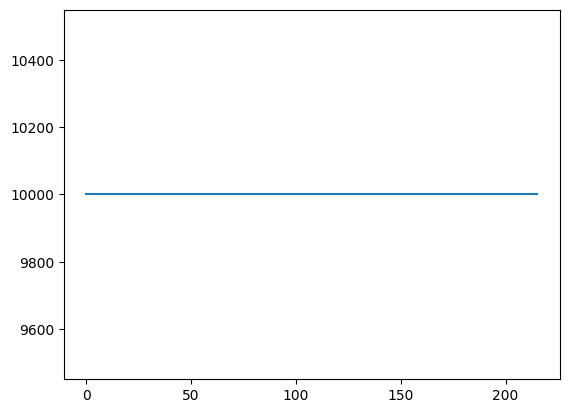

In [104]:
eval_index = 2
eval_env = DummyVecEnv([lambda: LStockDailyEnv(df_evals[eval_index])])
obs = eval_env.reset()

net_worths = []
actions = [Actions.Hold.value] * NEXT_OBSERVATION_SIZE
done, state = False, None
# while not done:

df_evals[eval_index].shape[0]
for _ in range(NEXT_OBSERVATION_SIZE, df_evals[eval_index].shape[0]):
#     print(obs)
    action, state = model.predict(obs, state=state, deterministic=True)
#     print(action)
    obs, reward, done, _info = eval_env.step(action)
    net_worths.append(_info[0]['net_worth'])
    
    actions.append(action[0])
#     eval_env.render()
    
dff = df_evals[eval_index].assign(action=actions)

dff = dff.drop(['open_normal', 'close_normal', 'high_normal', 'low_normal', 'volume_normal', 'amount_normal'], axis=1)

plt.plot(net_worths)
plt.show()

In [105]:
len(ddd)

40152

In [106]:
dddf = np.array(ddd)
dddf.shape

(40152, 4)

In [107]:
dddf[:,2][-100:]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

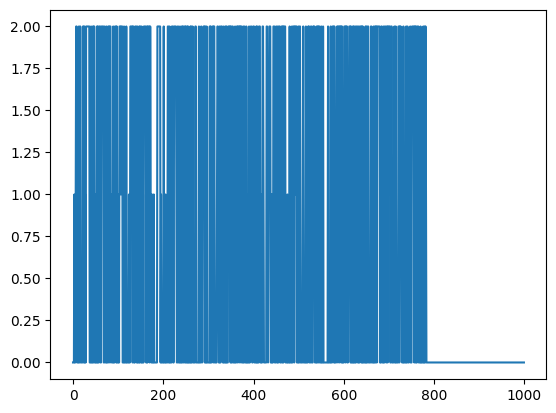

In [110]:
plt.plot(dddf[:,2][-1000:]) #, '.')
plt.show()

In [90]:
actions

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2]

In [77]:
dff

,open,close,high,low,volume,amount,action
date,,,,,,,
2021-01-04,2.99,2.99,3.02,2.94,40315824.0,123802240.0,0
2021-01-05,2.98,2.98,2.99,2.93,30595052.0,93401360.0,0
2021-01-06,2.97,3.00,3.03,2.95,32922308.0,101725976.0,0
2021-01-07,3.01,2.96,3.01,2.94,27664160.0,84836416.0,0
2021-01-08,2.97,2.99,3.03,2.93,23823348.0,73471008.0,0
...,...,...,...,...,...,...,...
2021-12-02,4.32,4.28,4.33,4.22,26826712.0,114336472.0,2
2021-12-03,4.28,4.30,4.34,4.20,24750200.0,105657792.0,2
2021-12-06,4.30,4.25,4.34,4.24,19724628.0,84525000.0,2


In [78]:
class PandasDataDd(PandasData):
    # Add a 'action' line to the inherited ones from the base class
    lines = ('action',)
    
    # add the parameter to the parameters inherited from the base class
    params = (('action', 7),)

In [79]:
class RLCross(bt.Strategy):
    def __init__(self):
#         self.sma1 = bt.indicators.SMA(self.dnames.d.dd, period=10, plot=False)
#         self.sma2 = bt.indicators.SMA(self.dnames.d.dd, period=20, plot=False)
        
#         self.crossover = bt.indicators.CrossOver(self.sma1, self.sma2)
        pass

    def next(self):
        
        if not self.position:  # not in the market
            if self.data0.action < 1: # if fast crosses slow to the upside
                price = self.data0.close[0]
                cash = self.broker.get_cash()
                share = int(math.floor((cash)/price))
                self.buy()  # enter long
        elif self.data0.action < 2 :  # in the market & cross to the downside
            self.close()


In [80]:
cerebro = bt.Cerebro(oldtrades=True)

feed = PandasDataDd(dataname=dff, action=6)

cerebro.adddata(feed, name='d')
cerebro.addstrategy(RLCross)

cerebro.broker.setcash(10000.0)

cerebro.broker.setcommission(0.0005)

print('Starting Portfolio Value: %.2f' % cerebro.broker.getvalue())
result = cerebro.run()
print('Final Portfolio Value: %.2f' % cerebro.broker.getvalue())

Starting Portfolio Value: 10000.00
Final Portfolio Value: 10000.07


In [154]:
cerebro.plot(
    iplot=False,
#     start=datetime.date(2021, 1, 1),
#     end=datetime.date(2021, 11, 24),
    style='candlestick',
    barup='green',
    bardown='red',
    barupfill=True, 
    bardownfill=False,
)

[[<Figure size 640x480 with 4 Axes>]]